<a href="https://colab.research.google.com/github/NihalShriv/ML-Libs-Learning/blob/master/Projects/RedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('red-wine-quality-cortez-et-al-2009.zip')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


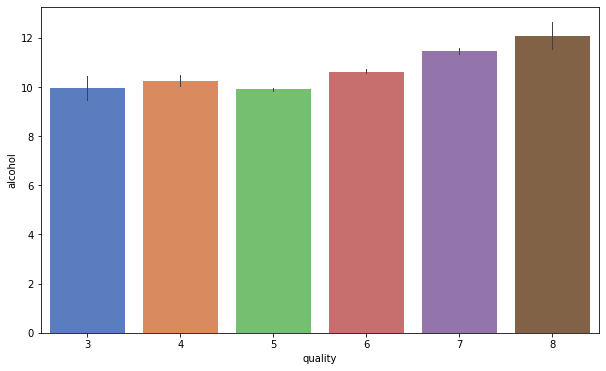

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=df, palette='muted', errwidth=1)
plt.show()

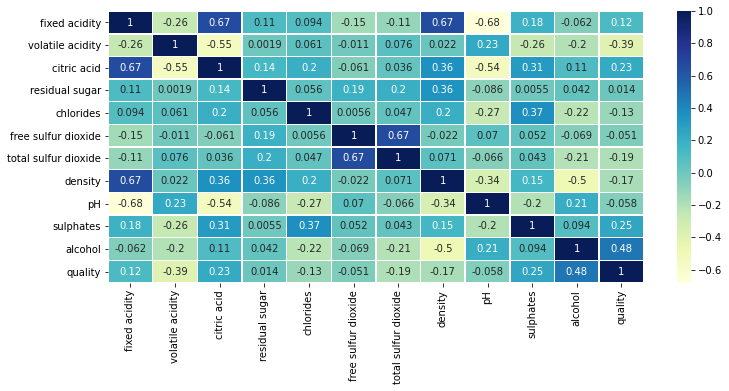

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), linewidths=.5, annot=True, cmap='YlGnBu')
plt.show()

In [10]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [12]:
y.unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

lst1 = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=i)

  model1 = DecisionTreeClassifier(random_state=1)
  model1.fit(X_train, y_train)
  y_pred1 = model1.predict(X_test)
  lst1.append(accuracy_score(y_test, y_pred1))

print('Random state:',lst1.index(max(lst1)), '\nHighest Accuracy Score:',max(lst1))

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=.25, random_state=132) #random_state is 132 as it has highest accuraqcy score

Random state: 132 
Highest Accuracy Score: 0.6725


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_test)
print(accuracy_score(y1_test, y_pred1)*100,'%')

67.25 %


In [19]:
from sklearn.svm import SVR

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=.25, random_state=0)

regressor = SVR(C=1000, gamma=10)
regressor.fit(X,y)
y_pred2 = regressor.predict(X2_test)
r2 = regressor.score(X2_test,y2_test)
print(r2*100,'%')

98.36772843986493 %
